In [1]:
import keras
import tensorflow as tf
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import plot_model



We trust you have received the usual lecture from the local System
Administrator. It usually boils down to these three things:

    #1) Respect the privacy of others.
    #2) Think before you type.
    #3) With great power comes great responsibility.

[sudo] password for hshugart: 


In [2]:
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True, rescale=1/255)

targetSize = 150

train_generator = train_datagen.flow_from_directory('/nas/longleaf/home/hshugart/archive/archive/train',target_size=(targetSize, targetSize),batch_size=64,class_mode='categorical')

#Creating generator for Validation DataSet
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255)
val_generator = val_datagen.flow_from_directory('/nas/longleaf/home/hshugart/archive/archive/valid',target_size=(targetSize, targetSize),batch_size=32,class_mode='categorical')

#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255)
test_generator = test_datagen.flow_from_directory('/nas/longleaf/home/hshugart/archive/archive/test',target_size=(targetSize, targetSize),batch_size=32,class_mode='categorical')

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [4]:
model = Sequential()
model.add(layers.Conv2D(64, (15, 15), activation='relu', input_shape=(targetSize, targetSize, 3)))
model.add(layers.Conv2D(64, (9, 9)))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D(pool_size=(4, 4)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.LeakyReLU())
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dropout(0.35))
model.add(layers.Dense(1024, activation='relu'))
model.add(Dropout(0.35))
model.add(layers.Dense(400, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 136, 136, 64)      43264     
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      331840    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                        

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,epochs=70,validation_data=val_generator)
model.save("SequentialModelTwo")
np.save('SequntialModelTwoHistory.npy',history.history)

Epoch 1/70
913/913 [==============================] - 281s 285ms/step - loss: 5.5865 - accuracy: 0.0140 - val_loss: 5.0142 - val_accuracy: 0.0335
Epoch 2/70
913/913 [==============================] - 249s 272ms/step - loss: 4.9192 - accuracy: 0.0467 - val_loss: 4.4502 - val_accuracy: 0.0885
Epoch 3/70
913/913 [==============================] - 249s 273ms/step - loss: 4.5354 - accuracy: 0.0822 - val_loss: 4.1023 - val_accuracy: 0.1275
Epoch 4/70
913/913 [==============================] - 250s 274ms/step - loss: 4.3002 - accuracy: 0.1104 - val_loss: 3.8726 - val_accuracy: 0.1750
Epoch 5/70
913/913 [==============================] - 249s 273ms/step - loss: 4.1354 - accuracy: 0.1312 - val_loss: 3.7109 - val_accuracy: 0.1895
Epoch 6/70
913/913 [==============================] - 277s 303ms/step - loss: 3.9951 - accuracy: 0.1536 - val_loss: 3.5343 - val_accuracy: 0.2200
Epoch 7/70
913/913 [==============================] - 279s 305ms/step - loss: 3.8888 - accuracy: 0.1680 - val_loss: 3.4029 -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



913/913 [==============================] - 249s 273ms/step - loss: 3.0009 - accuracy: 0.3109 - val_loss: 2.5986 - val_accuracy: 0.4020
Epoch 32/70
913/913 [==============================] - 250s 273ms/step - loss: 2.9946 - accuracy: 0.3092 - val_loss: 2.6037 - val_accuracy: 0.4045
Epoch 33/70
913/913 [==============================] - 251s 274ms/step - loss: 2.9908 - accuracy: 0.3130 - val_loss: 2.5964 - val_accuracy: 0.4005
Epoch 34/70
913/913 [==============================] - 249s 272ms/step - loss: 2.9583 - accuracy: 0.3186 - val_loss: 2.4937 - val_accuracy: 0.4190
Epoch 35/70
913/913 [==============================] - 248s 271ms/step - loss: 2.9314 - accuracy: 0.3233 - val_loss: 2.5239 - val_accuracy: 0.4245
Epoch 36/70
913/913 [==============================] - 248s 271ms/step - loss: 2.9150 - accuracy: 0.3238 - val_loss: 2.5501 - val_accuracy: 0.4055
Epoch 37/70
913/913 [==============================] - 251s 274ms/step - loss: 2.9119 - accuracy: 0.3248 - val_loss: 2.7309 - val_

In [6]:
model = keras.models.load_model("SequentialModelTwo")
history=np.load('SequntialModelTwoHistory.npy',allow_pickle='TRUE').item()

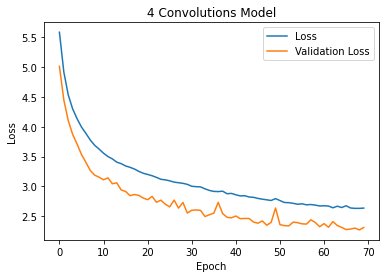

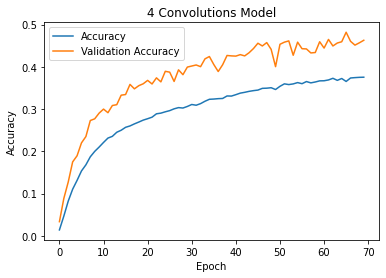

63/63 [==============================] - 5s 84ms/step - loss: 2.2365 - accuracy: 0.4665


[2.2365334033966064, 0.46650001406669617]

In [7]:
import matplotlib.pyplot as plt
#Loss
plt.plot(history['loss'],label='Loss')
plt.plot(history['val_loss'],label='Validation Loss')
plt.title("4 Convolutions Model")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('ComplexSeqLossGraph.png')
plt.show()
#Accuracy
plt.plot(history['accuracy'],label='Accuracy')
plt.plot(history['val_accuracy'],label='Validation Accuracy')
plt.title("4 Convolutions Model")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ComplexSeqAccuracyGraph.png')
plt.show()

plot_model(model)
model.evaluate(test_generator)